# Machine Intelligence II - Team MensaNord
## Sheet 08

- Nikolai Zaki
- Alexander Moore
- Johannes Rieke
- Georg Hoelger
- Oliver Atanaszov

In [1]:
from __future__ import division, print_function
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import numpy as np

## Exercise 1

In [2]:
def E_s(W, s):
    W_local = np.copy(W)
    for col in range(W_local.shape[0]):
        W_local[col, :] *= s[col]
        W_local[:, col] *= s[col]
    # print("# ", W_local)
    # print("# s:", s, "\tE:", - np.sum(W_local) / 2)
    return - np.sum(W_local) / 2

### plotting (a) with M = 1

In [3]:
# loop borders
t_max = 150

# Temperature ( beta == noise ) decreasing with factor tau
beta_0 = np.random.random() / 50
beta_0 = 0.007080269862410016
print("beta: ", beta_0)
print("Temp: ", 1 / beta_0) # == Temperature

tau = np.random.random() / 10 + 1
tau = 1.064168355840528
print("tau: ", tau)

beta:  0.007080269862410016
Temp:  141.2375544199406
tau:  1.064168355840528



s:  [-1 -1 -1  1  1 -1]
W:  [[ 0.          0.56017005  0.44456597  0.43450962  0.6157965   0.68405056]
 [ 0.56017005  0.          0.34383935  0.51386398  0.4499107   0.74056969]
 [ 0.44456597  0.34383935  0.          0.89637617  0.71340219  0.462468  ]
 [ 0.43450962  0.51386398  0.89637617  0.          0.60596283  0.53142878]
 [ 0.6157965   0.4499107   0.71340219  0.60596283  0.          0.42033827]
 [ 0.68405056  0.74056969  0.462468    0.53142878  0.42033827  0.        ]]

validation min 0.733999749529
new min
new min
new min
validation min -8.41725264754

result: 	s: [-1 -1 -1 -1 -1 -1] 	E: -8.41725264754


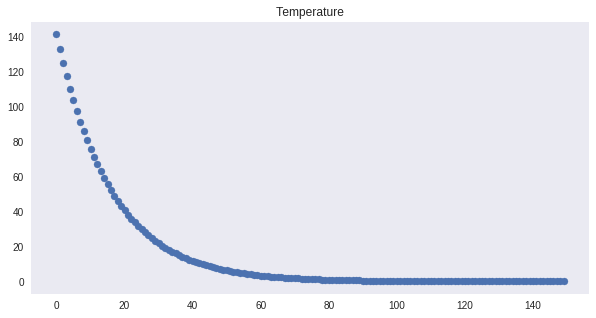

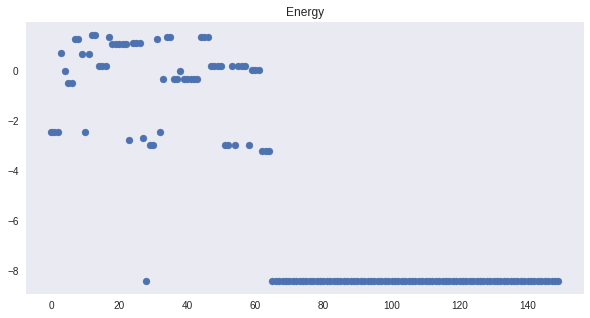

In [7]:
# INITIALIZATION

M = 1
beta = beta_0

# configuration s
s = np.random.choice([-1, 1], 6)
print("\ns: ", s)

# weight matrix, symmetrical, diagonal 0
W = np.random.random(size=(6, 6))
W = (W + W.T)/2
for i in range(W.shape[0]):
    W[i, i] = 0
print("W: ", W)

# minimum for validation ( E >= validation_min @ any point)
validation_min = E_s(W, s)
print("\nvalidation min", validation_min)

# variables for plotting
T_plot = [0.0 for i in range(t_max * M)]
E_plot = [0.0 for i in range(t_max * M)]


# ALGORITHM

for t in range(t_max):
    for m in range(M):        
        i = np.random.randint(0, 6)
        s_local = np.copy(s)
        s_local[i] *= -1
        E_1 = E_s(W, s)
        E_2 = E_s(W, s_local)
        E_d = E_2 - E_1
        P = 1 / (1 + np.exp(beta*E_d))
        # print("\nt:", t, " i:", i, "\n s1:", s, "\tE1:", E_1, "\n s2:", s_local, "\tE2:", E_2)
        if np.random.random() < P:
            s = np.copy(s_local)
            # print("new s")
        if E_s(W, s) < validation_min:
            validation_min = E_s(W, s)
            print("new min")
        T_plot[M*t+m] = 1 / beta
        E_plot[M*t+m] = E_s(W, s)
    beta *= tau
    
# RESULTS

print("validation min", validation_min)
print("\nresult: \ts:", s, "\tE:", E_s(W, s))
# print("E_plot: ", E_plot)
# print("T_plot: ", T_plot)
# print(W)

plt.figure(figsize=(10, 5))
plt.scatter(range(t_max * M), T_plot)
plt.title('Temperature')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(range(t_max * M), E_plot)
plt.title('Energy')
plt.grid()
plt.show()

### plotting (a) with M = 500


s:  [-1 -1 -1 -1 -1 -1]
W:  [[ 0.          0.24163601  0.33421698  0.47590737  0.53840565  0.37582615]
 [ 0.24163601  0.          0.59755121  0.2469511   0.4797754   0.64198545]
 [ 0.33421698  0.59755121  0.          0.26031671  0.41562438  0.64093898]
 [ 0.47590737  0.2469511   0.26031671  0.          0.67985082  0.70671285]
 [ 0.53840565  0.4797754   0.41562438  0.67985082  0.          0.78613867]
 [ 0.37582615  0.64198545  0.64093898  0.70671285  0.78613867  0.        ]]

validation min -7.42183772977
validation min -7.42183772977

result: 	s: [1 1 1 1 1 1] 	E: -7.42183772977


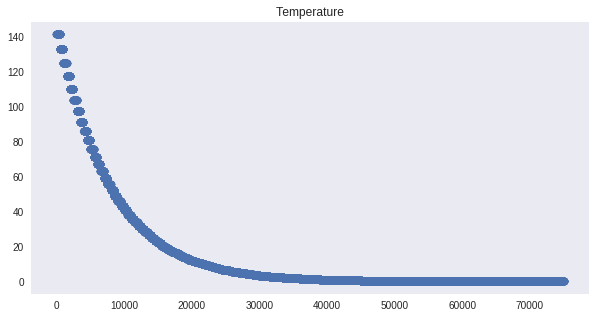

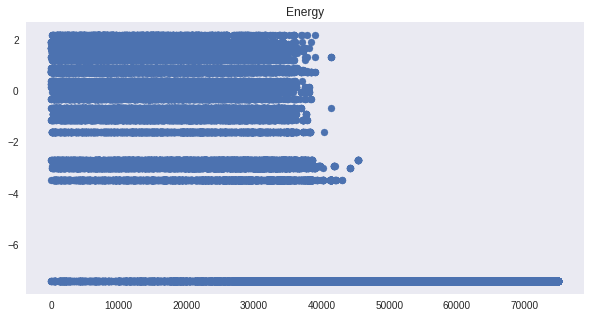

In [9]:
M = 500
beta = beta_0

# configuration s
s = np.random.choice([-1, 1], 6)
print("\ns: ", s)

# weight matrix, symmetrical, diagonal 0
W = np.random.random(size=(6, 6))
W = (W + W.T)/2
for i in range(W.shape[0]):
    W[i, i] = 0
print("W: ", W)

# minimum for validation ( E >= validation_min @ any point)
validation_min = E_s(W, s)
print("\nvalidation min", validation_min)

# variables for plotting
T_plot = [0.0 for i in range(t_max * M)]
E_plot = [0.0 for i in range(t_max * M)]

# ALGORITHM

for t in range(t_max):
    for m in range(M):        
        i = np.random.randint(0, 6)
        s_local = np.copy(s)
        s_local[i] *= -1
        E_1 = E_s(W, s)
        E_2 = E_s(W, s_local)
        E_d = E_2 - E_1
        P = 1 / (1 + np.exp(beta*E_d))
        # print("\nt:", t, " i:", i, "\n s1:", s, "\tE1:", E_1, "\n s2:", s_local, "\tE2:", E_2)
        if np.random.random() < P:
            s = np.copy(s_local)
            # print("new s")
        if E_s(W, s) < validation_min:
            validation_min = E_s(W, s)
            print("new min")
        T_plot[M*t+m] = 1 / beta
        E_plot[M*t+m] = E_s(W, s)
    beta *= tau
    
# RESULTS

print("validation min", validation_min)
print("\nresult: \ts:", s, "\tE:", E_s(W, s))
# print("E_plot: ", E_plot)
# print("T_plot: ", T_plot)
# print(W)

plt.figure(figsize=(10, 5))
plt.scatter(range(t_max * M), T_plot)
plt.title('Temperature')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(range(t_max * M), E_plot)
plt.title('Energy')
plt.grid()
plt.show()

### plotting (b)

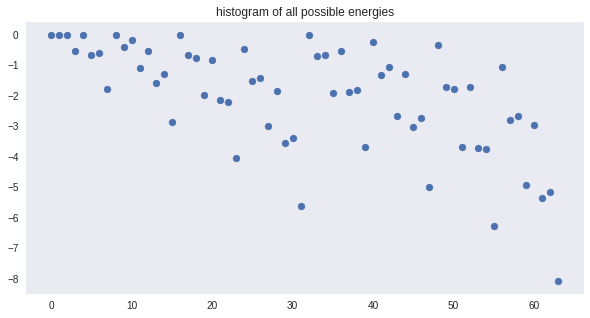

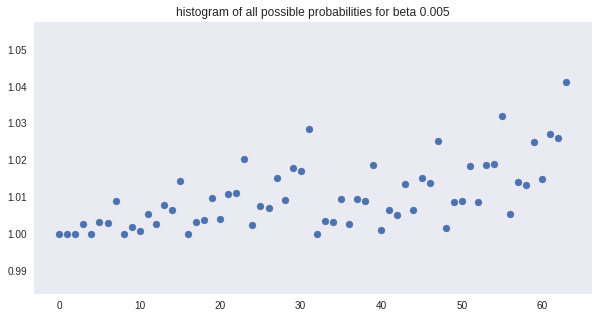

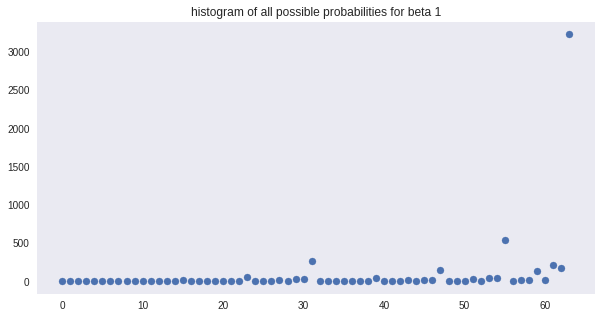

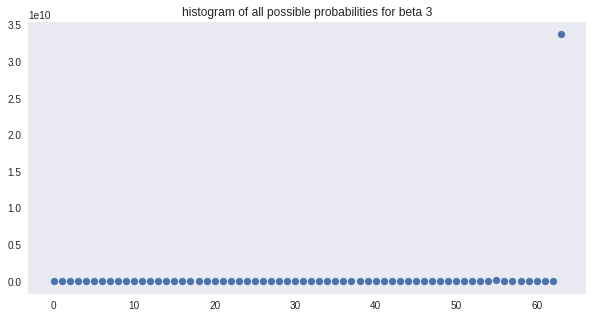

In [6]:
# generate all posible states & energies
all_states = [[0, 0, 0, 0, 0, 0] for i in range(2**6)]
all_energies = [0.0 for i in range(2**6)]
for si in range(2**6):
    all_states[si] = [int(x) for x in list('{0:06b}'.format(si))]
    all_energies[si] = E_s(W, all_states[si])

plt.figure(figsize=(10, 5))
plt.scatter(range(2**6), all_energies)
plt.title('histogram of all possible energies')
plt.grid()
plt.show()

probab_beta = [0.005, 1, 3]

for beta in probab_beta:
    Z = 0
    for en in all_energies:
        Z += np.exp(-beta * en)
    
    all_probabilities = [0.0 for i in range(2**6)]
    for si in range(2**6):
        all_probabilities[si] = np.exp(-beta * all_energies[si])
    
    plt.figure(figsize=(10, 5))
    plt.scatter(range(2**6), all_probabilities)
    plt.title('histogram of all possible probabilities for beta {}'.format(beta))
    plt.grid()
    plt.show()